 In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:



# 1.) What was the change in price of the stock over time?
# 2.) What was the daily return of the stock on average?
# 3.) What was the moving average of the various stocks?
# 4.) What was the correlation between different stocks' closing prices?
# 4.) What was the correlation between different stocks' daily returns?
# 5.) How much value do we put at risk by investing in a particular stock?
# 6.) How can we attempt to predict future stock behavior?

# Part1

Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data, wb


# For time stamps
from datetime import datetime

# For division
from __future__ import division

list of tech companies

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

set end and start time

In [3]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for loop grabbing data for setting dataframe

In [4]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

adding stock of apple to AAPL likewise

for Google load in to GOOG soon

what globals() does is that it makes that string making to a global variable

now that is a dataframe now

In [5]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-19,135.470001,133.339996,133.509995,134.839996,94264200.0,134.043320
2021-04-20,135.529999,131.809998,135.020004,133.110001,94812300.0,132.323532
2021-04-21,133.750000,131.300003,132.360001,133.500000,68847100.0,132.711227
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.160461
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,133.526382


In [6]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-19,2318.449951,2287.844971,2291.979980,2302.399902,1234400,2302.399902
2021-04-20,2309.600098,2271.709961,2307.889893,2293.629883,1088700,2293.629883
2021-04-21,2295.320068,2258.570068,2285.250000,2293.290039,1196500,2293.290039
2021-04-22,2303.761963,2256.449951,2293.229980,2267.919922,1054800,2267.919922
2021-04-23,2325.820068,2278.209961,2283.469971,2315.300049,1433500,2315.300049
...,...,...,...,...,...,...
2022-04-11,2658.783936,2592.350098,2658.000000,2595.929932,1209400,2595.929932
2022-04-12,2648.469971,2551.520020,2648.469971,2567.489990,1150200,2567.489990
2022-04-13,2613.114990,2568.771973,2572.530029,2605.719971,977100,2605.719971


APPLE Dataframe

In [ ]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,153.819684,150.660276,152.147431,152.324190,8.652717e+07,151.981772
std,16.465878,15.721689,16.117615,16.126816,2.548173e+07,16.310202
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.251930
25%,144.059998,141.270004,142.270004,142.449997,6.902310e+07,141.848877
50%,150.839996,148.490005,149.449997,149.550003,8.086110e+07,149.142044
75%,169.580002,164.910004,167.369995,166.229996,9.867070e+07,166.018478
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


to get general info

In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-04-19 to 2022-04-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


histroical view of closing price

<AxesSubplot:xlabel='Date'>

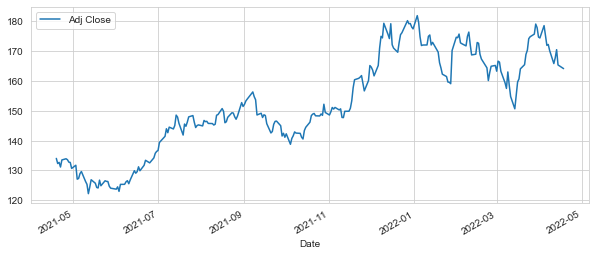

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

plot the volume of the stock being traded in a day over a year

<AxesSubplot:xlabel='Date'>

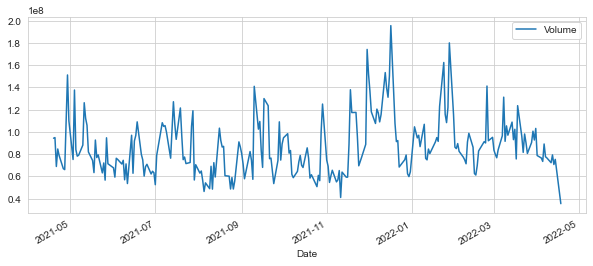

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

# Part2

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

calculate the moving average of the stock

calculate several moving avg

for 10 20 50 days interval

In [11]:
ma_day = [10,20,50]

In [12]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

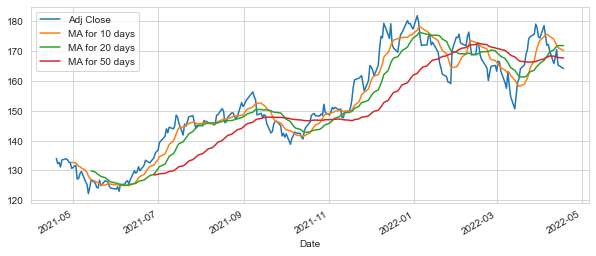

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

above we get smoother curve as the interval increases like for 50 days with red line

it gives the price with removing the daily fluctuations

daily returns of the stock

for apple

<AxesSubplot:xlabel='Date'>

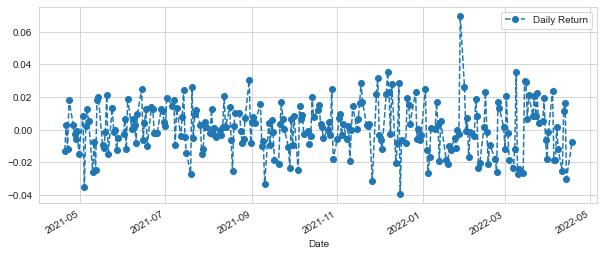

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(10,4),marker='o',linestyle='--')

avg daily return can be seen by histograms

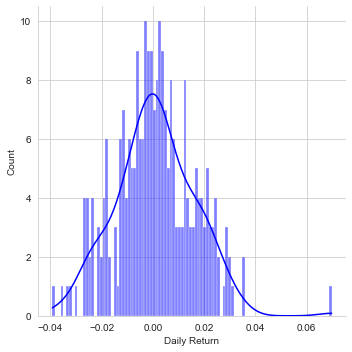

In [15]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='blue',kde=True)

above is drawn using seaborn which even gives kde plot on it

below is python builtin hist() which gives histogram

another way

<AxesSubplot:>

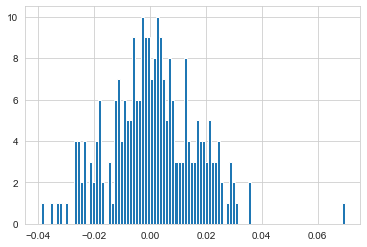

In [16]:
AAPL['Daily Return'].hist(bins=100)

analyze returns of all the stocks in the list of tech 

how ???

bulid new data frame with all the [Adj Close] columns  for each of the stock dataframe

In [17]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

by specifying the ['Adj Close]

we specify that we need only that column in the dataframe of each tech_company

In [18]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-19,134.043320,2302.399902,256.649475,3372.010010
2021-04-20,132.323532,2293.629883,256.173370,3334.689941
2021-04-21,132.711227,2293.290039,258.474609,3362.020020
2021-04-22,131.160461,2267.919922,255.092194,3309.040039
2021-04-23,133.526382,2315.300049,259.040009,3340.879883


closing returns for all the stocks

In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-19,NaN,NaN,NaN,NaN
2021-04-20,-0.012830,-0.003809,-0.001855,-0.011068
2021-04-21,0.002930,-0.000148,0.008983,0.008196
2021-04-22,-0.011685,-0.011063,-0.013086,-0.015758
2021-04-23,0.018038,0.020891,0.015476,0.009622


comparing google stocks with google stock closing daily returns

C:\Users\Balaji - Office\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


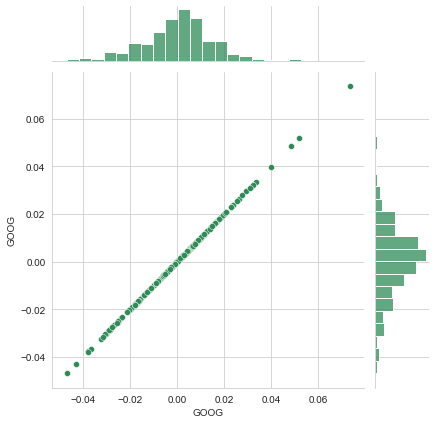

In [21]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

compare 2 different stocks

C:\Users\Balaji - Office\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


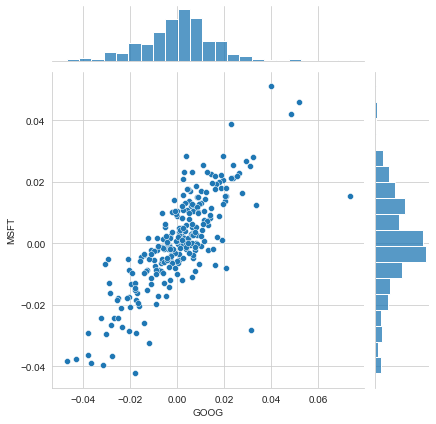

In [22]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

 Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

 url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

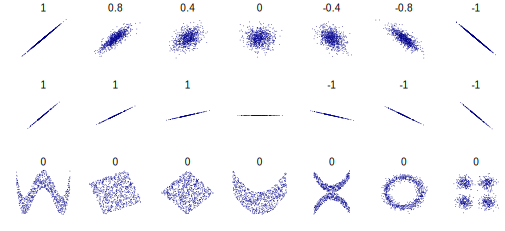

In [23]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

# part3

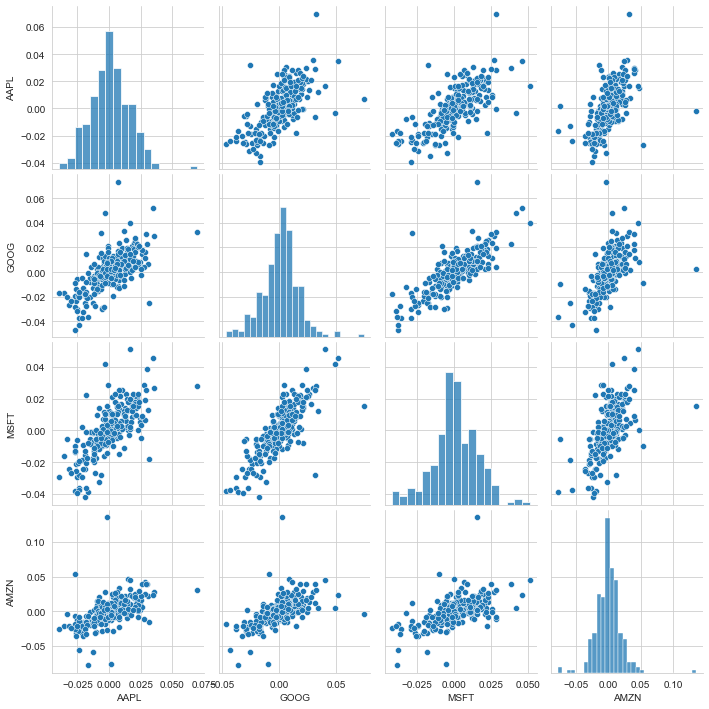

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

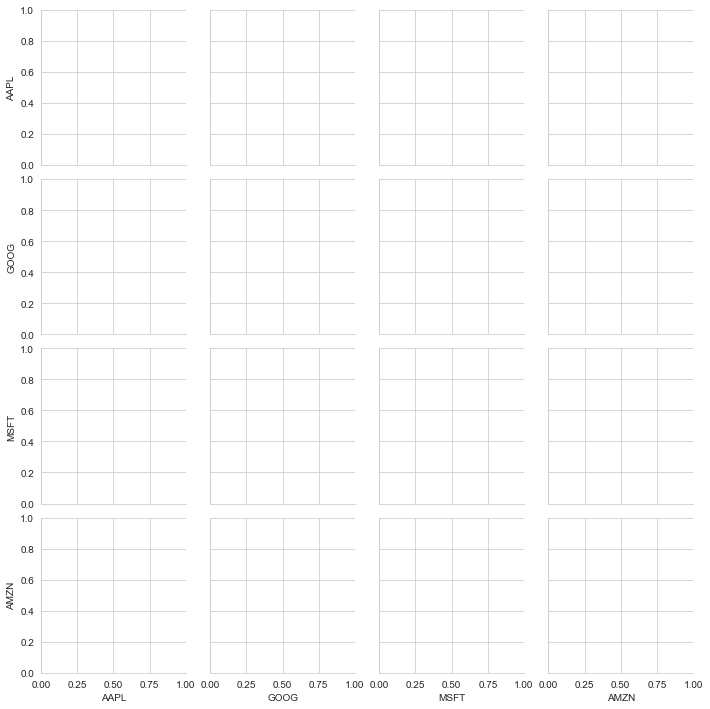

In [27]:
sns.PairGrid(data=tech_rets,dropna=True)

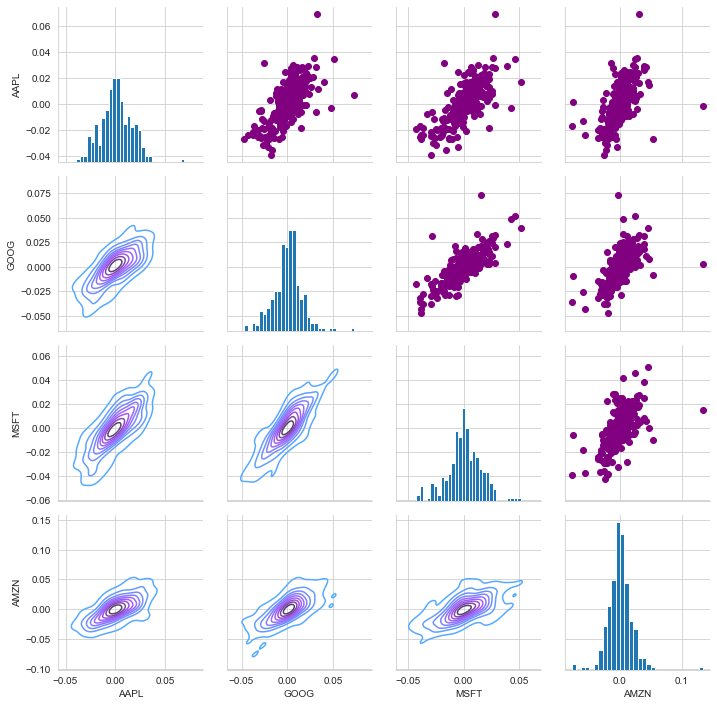

In [29]:
returns_fig = sns.PairGrid(data=tech_rets,dropna=True)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

analyze of corelation between the closing prices

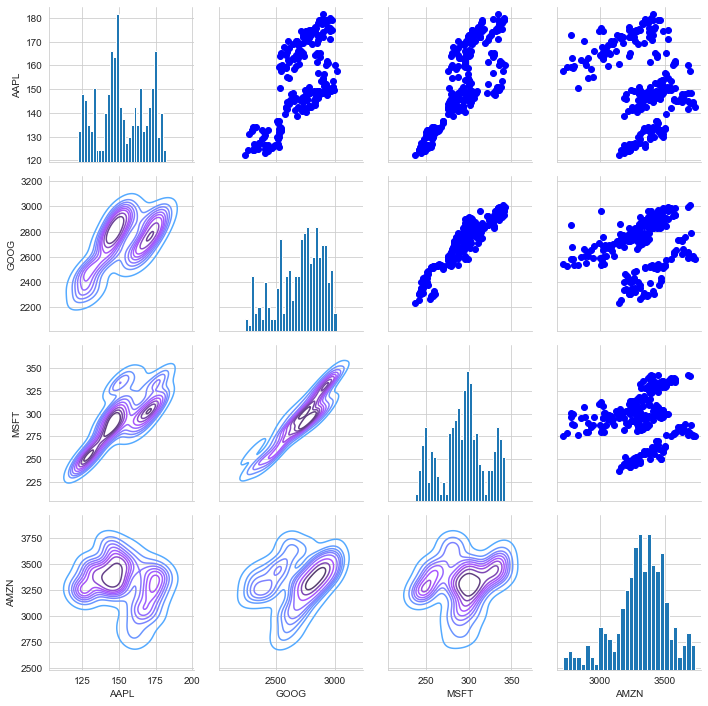

In [31]:
returns_fig = sns.PairGrid(data=closing_df,dropna=True)

returns_fig.map_upper(plt.scatter,color='blue')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

corelation plot for daily returns

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

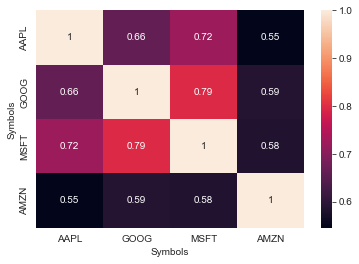

In [37]:
cor = tech_rets.dropna().corr()
sns.heatmap(cor,annot=True)

corelation plot of closing prices

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

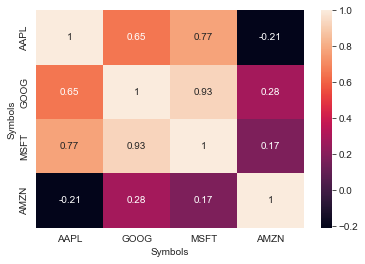

In [38]:
cor1 = closing_df.corr()

sns.heatmap(cor1,annot=True)

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that google and microsoft had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

# part4

# Risk analysis


There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

 Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame


In [39]:
rets = tech_rets.dropna()

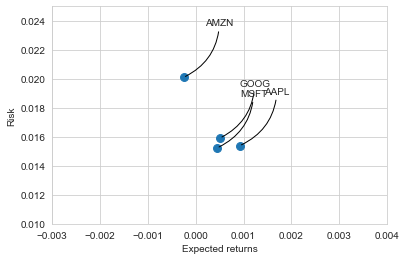

In [51]:
area = np.pi*20

plt.scatter(x=rets.mean(),y=rets.std(),s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])


plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))

# Part 5

# Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile



Let's go ahead and repeat the daily returns histogram for Apple stock.

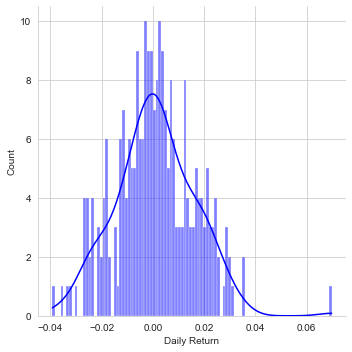

In [54]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='blue',kde=True)

use quantile to get the risk---builtin in python

In [55]:
rets.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-20,-0.012830,-0.003809,-0.001855,-0.011068
2021-04-21,0.002930,-0.000148,0.008983,0.008196
2021-04-22,-0.011685,-0.011063,-0.013086,-0.015758
2021-04-23,0.018038,0.020891,0.015476,0.009622
2021-04-26,0.002978,0.004941,0.001532,0.020390


In [56]:
rets['AAPL'].quantile(0.05)

-0.02519167003123307

The 0.05 empirical quantile of daily returns is at -0.025. That means that with 95% confidence, our worst daily loss will not exceed 2.5%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.025 * 1,000,000 = $25,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

In [59]:
rets['GOOG'].quantile(0.05)

-0.027707246862179864

In [60]:
rets['MSFT'].quantile(0.05)

-0.02762498703540392

In [61]:
rets['AMZN'].quantile(0.05)

-0.02837024216564062

# Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔS/S = μΔt + σϵ(Δt)^1/2

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS = S(μΔt + σϵ(Δt)^1/2)

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [63]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']



In [64]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+ (price[x-1]*(drift[x] + shock[x]))

    return price

In [65]:
# Get start price from GOOG.head()
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-19,2318.449951,2287.844971,2291.979980,2302.399902,1234400,2302.399902
2021-04-20,2309.600098,2271.709961,2307.889893,2293.629883,1088700,2293.629883
2021-04-21,2295.320068,2258.570068,2285.250000,2293.290039,1196500,2293.290039
2021-04-22,2303.761963,2256.449951,2293.229980,2267.919922,1054800,2267.919922
2021-04-23,2325.820068,2278.209961,2283.469971,2315.300049,1433500,2315.300049


Text(0.5, 1.0, 'Monte carlo Analysis for GOOGLE')

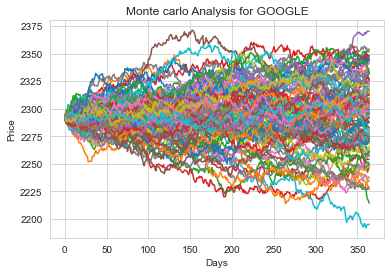

In [66]:
start_price = 2291.97

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo Analysis for GOOGLE')

histogram of the above

In [67]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

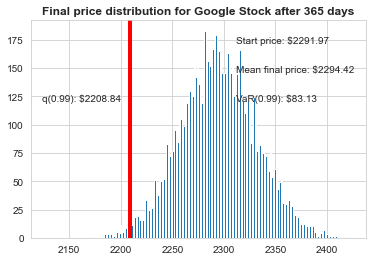

In [68]:
# Now we'll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $83.13 for every investment of 2291.97 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $83.13 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.